In [1]:
!gdown 1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC

Downloading...
From: https://drive.google.com/uc?id=1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC
To: C:\Users\mimi_\Documents\GitLab\vnp-2023-24\av7\data_g1.csv

  0%|          | 0.00/9.79M [00:00<?, ?B/s]
  5%|5         | 524k/9.79M [00:00<00:03, 2.44MB/s]
 16%|#6        | 1.57M/9.79M [00:00<00:02, 3.07MB/s]
 32%|###2      | 3.15M/9.79M [00:00<00:01, 5.15MB/s]
 43%|####2     | 4.19M/9.79M [00:00<00:01, 5.22MB/s]
 54%|#####3    | 5.24M/9.79M [00:01<00:00, 5.23MB/s]
 64%|######4   | 6.29M/9.79M [00:01<00:00, 5.17MB/s]
 75%|#######4  | 7.34M/9.79M [00:01<00:00, 5.27MB/s]
 86%|########5 | 8.39M/9.79M [00:01<00:00, 5.29MB/s]
 96%|#########6| 9.44M/9.79M [00:01<00:00, 5.31MB/s]
100%|##########| 9.79M/9.79M [00:01<00:00, 5.02MB/s]


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data_g1.csv')

In [3]:
data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
1,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
2,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
3,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
4,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119598,130172,40,165,65,84.0,1.2,1.2,1,1,130,...,36,132,16.1,1,0.9,22,35,31,0,1
119599,119753,25,165,55,71.0,1.0,1.0,1,1,124,...,64,82,16.0,1,0.8,24,16,14,0,1
119600,130561,40,160,60,74.0,0.6,1.0,1,1,102,...,73,81,13.0,1,0.9,18,9,12,1,1
119601,29084,40,175,80,86.0,1.5,1.0,1,1,127,...,35,81,14.5,1,0.8,23,31,32,0,1


In [4]:
data.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [5]:
data = data.drop(columns='id')

In [6]:
len(data)

119603

In [7]:
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
1,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
2,45,160,55,69.0,1.5,1.2,1,1,150,88,...,69,122,13.0,1,0.7,17,12,16,0,0
3,55,155,60,84.5,0.7,0.9,1,1,137,91,...,51,198,14.5,1,0.7,16,15,16,0,0
4,40,155,50,73.0,1.5,1.5,1,1,105,70,...,55,122,13.2,1,0.7,22,16,14,0,0


<AxesSubplot:>

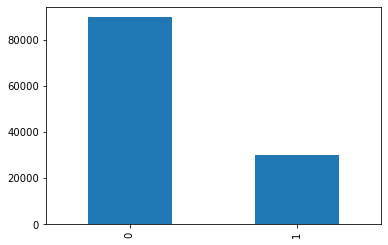

In [8]:
data['smoking'].value_counts().plot.bar()

In [9]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,...,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000
mean,45.219727,163.775482,65.460080,82.100653,0.990653,0.984779,1.025911,1.025367,122.200396,76.493441,...,57.282677,115.370058,14.553406,1.077364,0.874245,25.297559,25.464194,32.554025,0.182052,0.250830
std,12.019891,9.060404,12.547429,9.062907,0.407614,0.400383,0.158870,0.157239,13.018763,9.106010,...,14.272188,28.504080,1.471435,0.354414,0.185319,9.364472,17.450445,28.076767,0.385889,0.433493
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,15.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,155.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,113.000000,70.000000,...,46.000000,95.000000,13.500000,1.000000,0.700000,20.000000,16.000000,17.000000,0.000000,0.000000
50%,45.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,121.000000,77.000000,...,55.000000,115.000000,14.700000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,134.000000,15.700000,1.000000,1.000000,29.000000,31.000000,39.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,20.400000,6.000000,9.900000,778.000000,2914.000000,926.000000,1.000000,1.000000


In [10]:
X, Y = data.drop(columns=['smoking']), data['smoking']

In [11]:
from xgboost import cv, DMatrix, plot_importance, XGBClassifier


data_dmatrix = DMatrix(data=X, label=Y)



params = {"objective":"binary:logistic",'colsample_bytree': 0.7,'learning_rate': 0.01,
                'max_depth': 3}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [12]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.807352,0.000502,0.806555,0.002332
1,0.811402,0.003975,0.811209,0.005674
2,0.817794,0.005335,0.817271,0.005757
3,0.820601,0.002718,0.820284,0.003079
4,0.822640,0.002557,0.822508,0.002848
5,0.824266,0.002230,0.823920,0.003657
6,0.824287,0.002065,0.823852,0.003607
7,0.825062,0.001361,0.824664,0.002392
8,0.825311,0.001403,0.824775,0.002118
9,0.826391,0.001595,0.825812,0.001705


In [13]:
xgb_clf = XGBClassifier(**params)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
xgb_clf.fit(X_train, Y_train)

C:\Users\mimi_\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

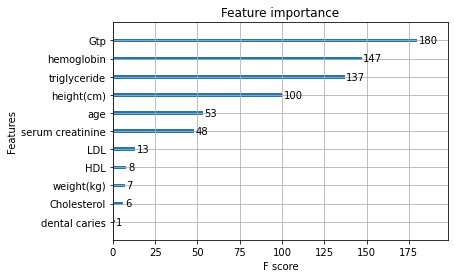

In [16]:
plot_importance(xgb_clf)

## GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 700],
    'learning_rate': [0.1, 0.01, 0.05]
}

In [34]:
estimator = XGBClassifier(objective="binary:logistic",use_label_encoder=False)

In [35]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=1,
    cv=10,
    verbose=0
)

In [36]:
grid_search.fit(X, Y)

[20:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:29:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:51:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[21:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 700]},
             scoring='roc_auc')

In [37]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [40]:
cv = KFold(5)

In [41]:
predictions = cross_val_predict(grid_search.best_estimator_, X, Y, cv=cv)

[22:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
f1_score(Y, predictions, average='weighted')

0.6503080619423265

<AxesSubplot:>

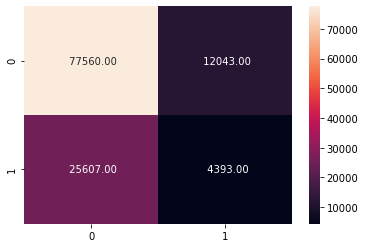

In [43]:
sns.heatmap(confusion_matrix(Y, predictions), annot=True, fmt='9.2f')

## Decision Tree

In [26]:
cv = KFold(5)

In [28]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(2, 6),
    "min_samples_split": range(20, 50, 5),
}


In [29]:
results = []
for criterion in params['criterion']:
  for max_depth in params['max_depth']:
    for min_samples in params['min_samples_split']:
      clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples)
      predictions = cross_val_predict(clf, X, Y, cv=cv)
      node = {
          "model": clf,
          "score": f1_score(Y, predictions, average='weighted')
      }
      results.append(node)

In [30]:
results.sort(key=lambda x: x['score'], reverse=True)

In [31]:
best_model = results[0]['model']

In [32]:
predictions = cross_val_predict(best_model, X, Y, cv=cv)

In [33]:
f1_score(Y, predictions, average='weighted')

0.6257606676890797

<AxesSubplot:>

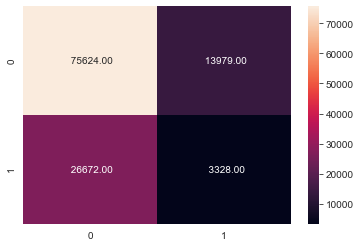

In [34]:
sns.heatmap(confusion_matrix(Y, predictions), annot=True, fmt='9.2f')